# Mel Spectrograms for Speech Analysis

+ ###### Author: Dirk Van Compernolle   
+ ###### Modification History:   1/1/2020, 11/02/2023, 23/11/2023
+ ###### Requires:  pyspch>=0.7

In [1]:
# uncomment the pip install command to install pyspch -- it is required!
#
#!pip install git+https://github.com/compi1234/pyspch.git
#
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
# Do the imports #
##################
#
%matplotlib inline
import os,sys 
import numpy as np
import pandas as pd
from IPython.display import display, Audio, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout, HBox, VBox
#   
import pyspch.sp as Sps
import pyspch.core as Spch
import pyspch.display as Spd
import matplotlib.pyplot as plt
# make notebook cells stretch over the full screen
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

## The Mel Spectrogram

+ for a readup on the mel-scale, it is advised to run [mel_scale.ipynb notebook](mel_scale.ipynb) in this folder first.
+ The most important info is summarized below
    - The mel scale provides a mapping between Hz and mel which is indicative for the non linear frequency axis of human hearing.  There are a number of almost equivalent transformation in use.  Our software uses the librosa default which is the same as the 'Slaney' mapping below.
      <img src=mel_scale.png>
    - By using a **mel filterbank** we can transform a Fourier spectrum into a **mel spectrum**.  In the example below we show an 80 channel filterbank for usage with 16kHz wide band speech.
    <img src="mel_filterbank80_cf.png">
    <img src="mel_filterbank80_filt.png">

+ The resolution of a mel spectrogram is defined by the number of mel filterbanks (and obviously also on available bandwidth given the sampling rate). Grosso modo we distinguish two scenarios:
    - a **critical band** mel filterbank: the bands are roughly "one mel" wide; which is the minimal filterbank that will preserve spectral envelope well, but due its low resolution pitch information will be largely lost.   
        - Recommended number of channels: *20(8kHz), 24(16kHz)*  
    - a **high resolution** mel filterbank: will maintain both pitch and spectral envelope information, it performs merely spectral warping onto the mel scale.
        - Recommended number of channels: *64(8kHz), 80(16kHz)*  

### Demo 1
This simply shows a critical band mel spectrogram together with a high resolution mel spectrogram

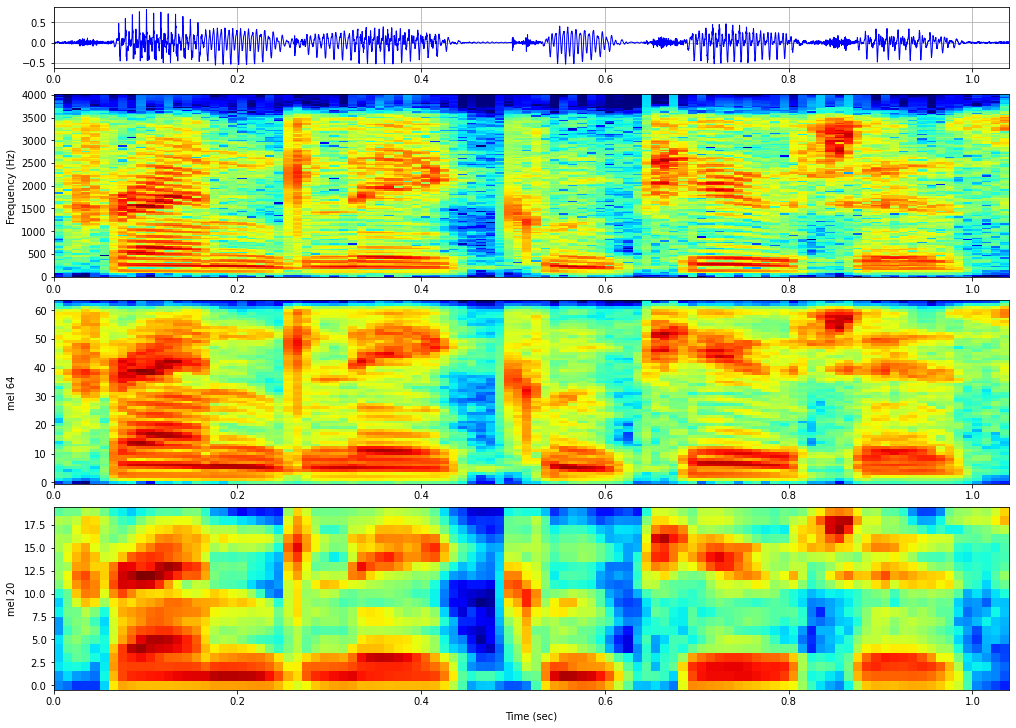

In [3]:
# read a datafile
dir='https://homes.esat.kuleuven.be/~spchlab/data/'
#file = "timit/audio/train/dr1/fcjf0/si1027" 
file = "timit/audio/train/dr2/marc0/sa1"
file = "misc/friendly"
wavfile = dir+file+".wav" 
wavdata, sr = Spch.audio.load(wavfile)

# compute a standard spectrogram and a low and high resolution mel spectrogram
nmels_lr = 24 if sr>8000 else 20
nmels_hr = 80 if sr>8000 else 64
spg = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=None)
spg_mel_hr = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=nmels_hr)
spg_mel_lr = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=nmels_lr)
label_lr = "mel "+str(nmels_lr)
label_hr = "mel "+str(nmels_hr)
#Spd.PlotSpg(wavdata=wavdata,spgdata=spg,sample_rate=sr,figsize=(14,10))
Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,img_ftrs=[spg_mel_hr,spg_mel_lr],img_labels=[label_hr,label_lr],sample_rate=sr,figsize=(14,10))

## Exercises

You are provided with an interactive setup in which you can
- choose from different input files (both 8kHz and 16kHz samples are provided)
- set the number of channels in the mel filterbank

In a second interactive setup (iSpectrogram2()) you are provided with a GUI that lets you view individual frames in detail.
Consider using that GUI if you feel that you need that level of detail to answer certain of the questions below.

#### Questions

+ How does the regular (Fourier) spectrogram compare with the mel spectrogram ?
    - think about psychoacoustics, source-filter model, ...
+ How does the mel spectrogram change visualy when you reduce the number of mel filterbanks from 80 to 24 to less than 10  ?
+ What seems the be the benefit of the mel spectrogram vs. a Fourier spectrogram
+ Are your responses dependent on the input sample (male vs female, 8kHz vs. 16kHz sampling rate, ... ) ?
+ Find the tuning frequency of the middle channel of your filterbank 
    + can estimate this by visual observation of spectrograms ?
    + is this frequency equal, lower or higher than sampling_rate/4 ?  (A standard spectrogram shows content from 0Hz to Nyquist (=sampling_rate/2) )
    + is the answer dependent on the choice for critical bands or high resolution ?

In [4]:
# our data directory to read from
dir='https://homes.esat.kuleuven.be/~spchlab/data/'

### Define spectrogram plot ###
def spectrogram_plot(n_mels=24,file="misc/friendly.wav"):
    wavfile = dir+file
    wavdata, sr = Spch.audio.load(wavfile)
    spg = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=None)
    spg_mel = Sps.spectrogram(wavdata,sample_rate=sr,n_mels=n_mels)
    fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,img_ftrs=[spg_mel],img_labels=["MEL "+str(n_mels)],sample_rate=sr,figsize=(14,8))
    display(fig,Audio(data=wavdata,rate=sr))

### GUI #####################
#############################
file_options = ["misc/friendly.wav","digits/15zz6a.wav","coding/f1.wav","misc/train.wav",
                "misc/timit1.wav","misc/timit2.wav","timit/audio/train/dr2/marc0/sa1.wav"]
wg_file = widgets.Dropdown(options=file_options,value="misc/friendly.wav",description="File Name")
#wg_file = widgets.Text(value=file,
#                        description="Wav Filename: ",continuous_update=False,layout=Layout(width='98%'))
wg_mels=widgets.IntSlider(value=24,min=4,max=128,step=4,
                            continous_update=False,description="n_mels",
                                  orientation = 'horizontal') #,width='50%', style={'description_width':'20%'})
output = widgets.interactive_output(spectrogram_plot,{'n_mels':wg_mels,'file':wg_file})
 
wg_instructions = widgets.HTML(
    "<b>MEL SPECTROGRAM</b><br> \
    Move the n_mels Slider to control the number of filters to be used in the Mel Filterbank<br>\
    Check the 'mel'-box to work with mel-spectrograms")

ui = VBox([ wg_instructions, VBox([wg_file,wg_mels],layout=Spd.box_layout(width='100%',border='',align_items='flex-start'))],
          layout=Spd.box_layout(width='100%',padding='10px'))

# Run the GUI
display(VBox([ui, output]))

## GUI 2

This GUI provides a few extra's:
- you are given a slider that lets you highlight single frames in the right hand pane
- apart from the number of channels in the mel filterbank, you can also adjust the parameters of the FFT

In [5]:
Spd.iSpectrogram2(figwidth=12,fname='coding/f2.wav',MELFB=True)     

AttributeError: module 'pyspch.display' has no attribute 'iSpectrogram2'